# Employee Salary Prediction

## Problem Statement

In this notebook, we will perform a data analysis on the Employee Salary dataset. The dataset contains information on employee years of experience, age, gender, salary, department, location, and travel requirement. Our goal is to gain insights into the data and answer key business questions.

## Data Loading and Cleaning

This dataset only consists of a few data and cleaning is not required

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy import stats

In [2]:
employee_salary_df = pd.read_csv('Employee_Salary_Dataset.csv')
department_df = pd.read_csv('Department_Dataset.csv')

In [3]:
df = pd.merge(employee_salary_df,department_df, on = "ID" )

#### Summary of Dataset

In [4]:
df.head(5)

,ID,Experience_Years,Age,Gender,Salary,Dept_name,location,travel_required
0,1,5,28,Female,250000,HR,Pune,yes
1,2,1,21,Male,50000,Finance,Bangalore,no
2,3,3,23,Female,170000,Finance,Bangalore,no
3,4,2,22,Male,25000,Finance,Pune,no
4,5,1,17,Male,10000,Tech,Mumbai,no


In [5]:
df.tail(5)

,ID,Experience_Years,Age,Gender,Salary,Dept_name,location,travel_required
30,31,10,34,Male,80000,Tech,Mumbai,no
31,32,15,54,Male,900000,Tech,Pune,yes
32,33,20,55,Female,1540000,HR,Mumbai,yes
33,34,19,53,Female,9300000,HR,Bangalore,yes
34,35,16,49,Male,7600000,Tech,Bangalore,no


In [6]:
# Get summary statistics for numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_summary = df[num_cols].describe()

# Get value counts for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_counts = {}
for col in cat_cols:
    cat_counts[col] = df[col].value_counts()
    
print('Numerical columns summary:')
print(num_summary)
print('\nCategorical columns value counts:')
for col, counts in cat_counts.items():
    print(f'{col}:')
    print(counts)
    print()

Numerical columns summary:
              ID  Experience_Years        Age        Salary
count  35.000000          35.00000  35.000000  3.500000e+01
mean   18.000000           9.20000  35.485714  2.059147e+06
std    10.246951           7.55295  14.643552  3.170124e+06
min     1.000000           1.00000  17.000000  3.000000e+03
25%     9.500000           2.50000  22.500000  2.250000e+04
50%    18.000000           6.00000  29.000000  2.500000e+05
75%    26.500000          15.00000  53.500000  3.270000e+06
max    35.000000          27.00000  62.000000  1.000000e+07

Categorical columns value counts:
Gender:
Gender
Female    18
Male      17
Name: count, dtype: int64

Dept_name:
Dept_name
Tech       14
HR         12
Finance     9
Name: count, dtype: int64

location:
location
Bangalore    13
Mumbai       12
Pune         10
Name: count, dtype: int64

travel_required:
travel_required
no     22
yes    13
Name: count, dtype: int64



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                35 non-null     int64 
 1   Experience_Years  35 non-null     int64 
 2   Age               35 non-null     int64 
 3   Gender            35 non-null     object
 4   Salary            35 non-null     int64 
 5   Dept_name         35 non-null     object
 6   location          35 non-null     object
 7   travel_required   35 non-null     object
dtypes: int64(4), object(4)
memory usage: 2.3+ KB


In [8]:
lst = list(df.columns)
lst

['ID',
 'Experience_Years',
 'Age',
 'Gender',
 'Salary',
 'Dept_name',
 'location',
 'travel_required']

## Exploratory Data Analysis

Next, we perform exploratory data analysis (EDA) on the dataset. We create visualizations to understand the distribution of the data and identify any patterns or correlations.

### Correlation between Age and Salary

We identify any significant correlations between an employee's age and salary. 

The chart shows the correlation between Age and Salary is 0.67 which suggests that it is possible that the two have a direct relationship. However, the correlation is not considered to be very strong, as a correlation coefficient of 1 would indicate a perfect positive correlation.

             Age    Salary
Age     1.000000  0.668444
Salary  0.668444  1.000000


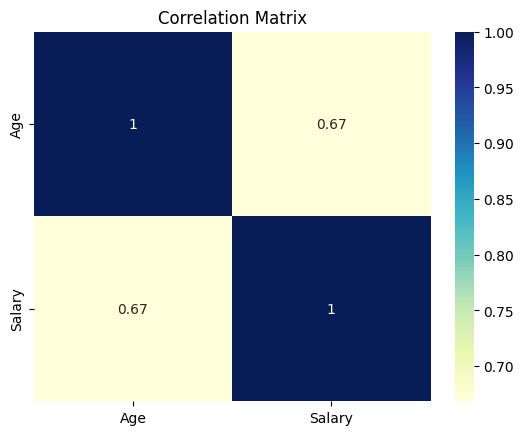

In [26]:
df_subset = df[['Age', 'Salary']]
corr = df_subset.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True)
plt.title('Correlation Matrix')
print(corr)
plt.show()

The scatterplot below shows the relationship between age and salary. 

it shows that the average amount of persons to get 

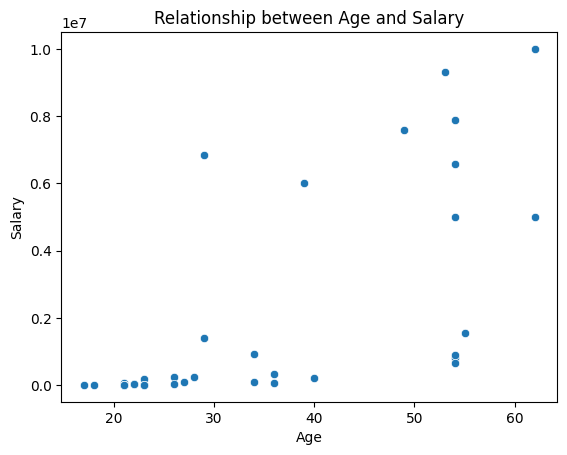

In [10]:
sns.scatterplot(data = df, x= "Age", y = "Salary")

plt.xlabel('Age')
plt.ylabel('Salary')
plt.title("Relationship between Age and Salary")

plt.show()

### Correlation between Years of Experience and Salary

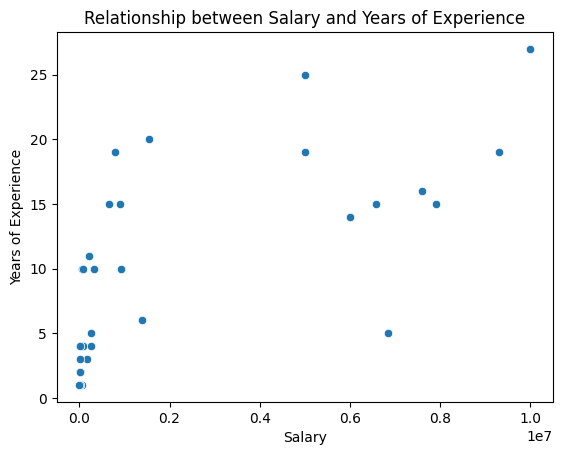

In [11]:
sns.scatterplot(data = df, x= "Salary", y = "Experience_Years")

plt.xlabel('Salary')
plt.ylabel('Years of Experience')
plt.title("Relationship between Salary and Years of Experience")

plt.show()

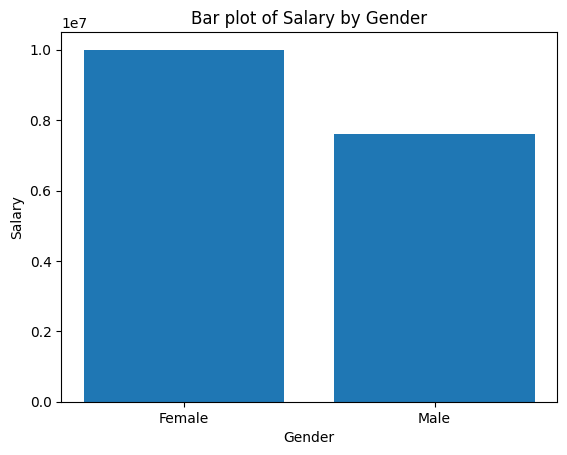

In [12]:
plt.bar(x=df['Gender'], height=df['Salary'])

plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Bar plot of Salary by Gender')

plt.show()

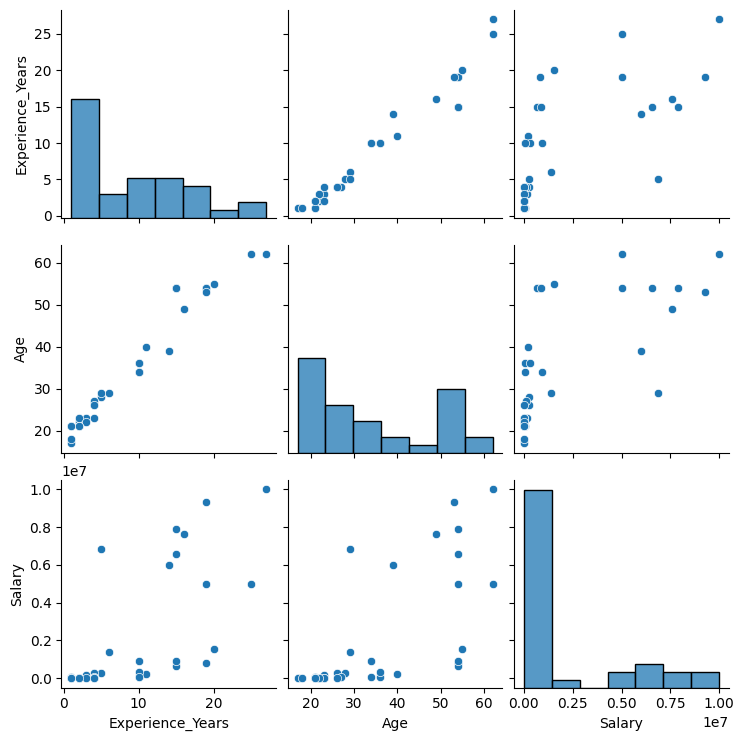

In [13]:
# Create a pair plot
sns.pairplot(data=df[['Experience_Years','Age','Salary']])

# Show plot
plt.show()

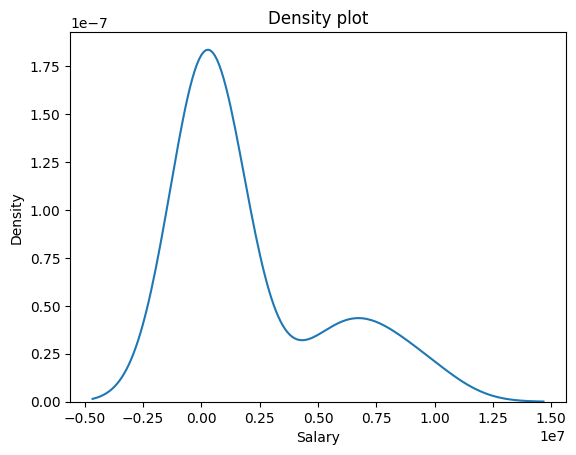

In [14]:
sns.kdeplot(data=df, x="Salary")

plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Density plot')

plt.show()

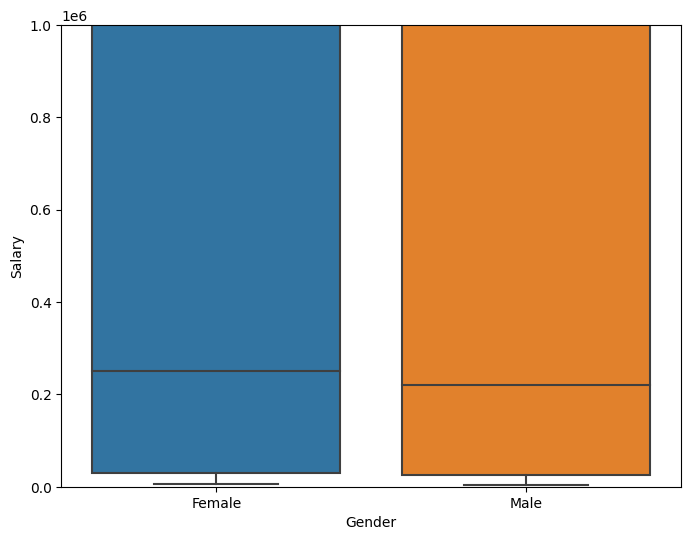

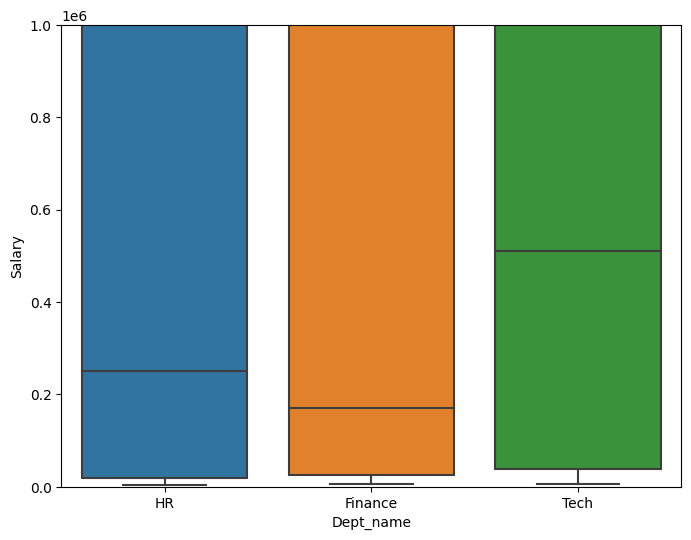

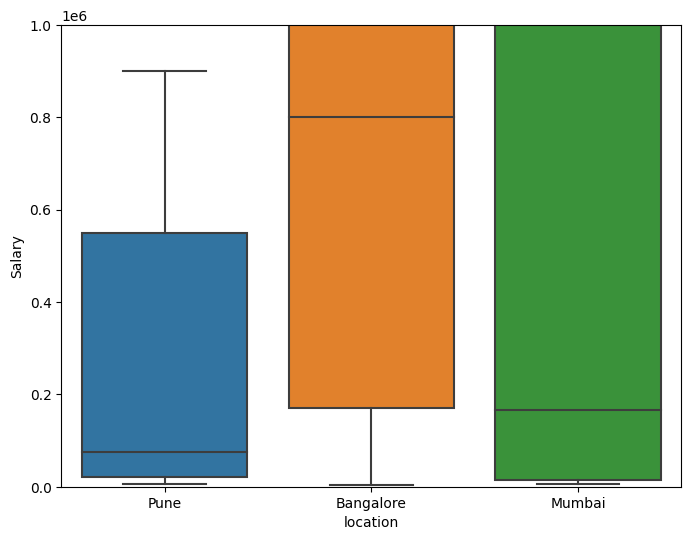

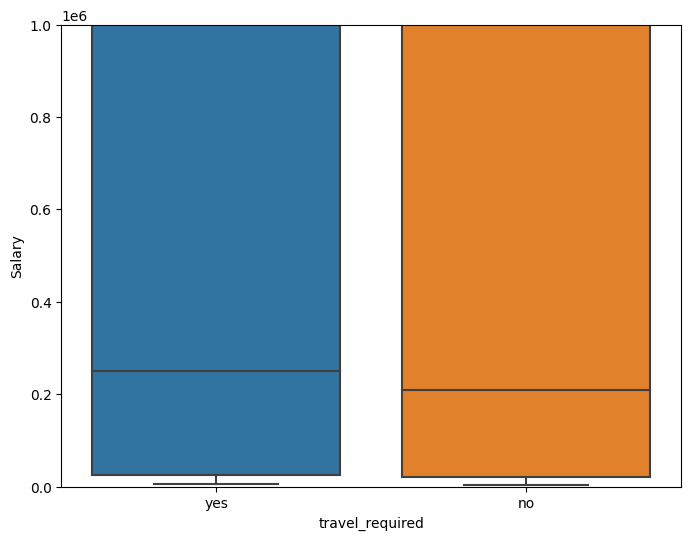

In [15]:
for i in cat_cols:
    data = pd.concat([df['Salary'], df[i]], axis = 1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=i, y="Salary", data=df)
    fig.axis(ymin=0, ymax=1000000); 

#### Gender distrubtion of employees

In [16]:
df['Gender'].value_counts()

Gender
Female    18
Male      17
Name: count, dtype: int64

In [17]:
male_count = (df['Gender'] == 'Male').sum()
female_count = (df['Gender'] == 'Female').sum()

total_count = male_count + female_count
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

print("The percentage of male employees is {:.2f}%".format(male_percentage), "%")
print("The percentage of female employees is {:.2f}%".format(female_percentage), "%")

The percentage of male employees is 48.57% %
The percentage of female employees is 51.43% %


#### Average Salary of all Employees

In [18]:
average_sal = df['Salary'].mean()
print("The average salary for all employees is {:.2f}%".format(average_sal))

The average salary for all employees is 2059147.14%


#### Average Salary for Each Department

In [19]:
df['Dept_name'].value_counts()

Dept_name
Tech       14
HR         12
Finance     9
Name: count, dtype: int64

In [20]:
tech_avg_salary = df.loc[df['Dept_name'] == 'Tech', 'Salary'].mean()
hr_avg_salary = df.loc[df['Dept_name'] == 'HR', 'Salary'].mean()
finance_avg_salary = df.loc[df['Dept_name'] == 'Finance', 'Salary'].mean()

table = [['Department', 'Average Salary'],
         ['Tech', '{:.2f}'.format(tech_avg_salary)],
         ['HR', '{:.2f}'.format(hr_avg_salary)],
         ['Finance', '{:.2f}'.format(finance_avg_salary)]
        ]
print(tabulate(table, headers='firstrow', floatfmt='.2f'))

Department      Average Salary
------------  ----------------
Tech                2077257.14
HR                  1958208.33
Finance             2165561.11


#### Highest Average Salary by Departments

In [21]:
max_salary_dept = max(tech_avg_salary,hr_avg_salary,finance_avg_salary)

if (max_salary_dept == tech_avg_salary):
    print("The Tech department has the highest average salary totaling at ${:.2f}".format(max_salary_dept))
elif max_salary_dept == hr_avg_salary:
    print("The HR department has the highest average salary totaling at ${:.2f}".format(max_salary_dept))
else:
    print("The Finance department has the highest average salary totaling at ${:.2f}".format(max_salary_dept))

The Finance department has the highest average salary totaling at $2165561.11


#### Comparison of Male and Female Salaries in the Company: T-Test Results

In [22]:
male_salaries = df[df['Gender'] == 'Male']['Salary']
female_salaries = df[df['Gender'] == 'Female']['Salary']

t, p = stats.ttest_ind(male_salaries, female_salaries)

print('t-statistic:', t)
print('p-value:', p)

t-statistic: 0.00800344199827126
p-value: 0.9936624342249365


The p-value is greater than the significance level of 0.05, therefore we fail to reject the null hypothesis that there is no significant difference in salaries between male and female employees.

#### Comparison of Salary based on Years of Experience: T-Test Results

In [23]:
df['Experience_Years'].describe()

count    35.00000
mean      9.20000
std       7.55295
min       1.00000
25%       2.50000
50%       6.00000
75%      15.00000
max      27.00000
Name: Experience_Years, dtype: float64

In [24]:
less_than_10_years = df[df['Experience_Years'] <= 10]['Salary']
more_than_10_years = df[df['Experience_Years'] > 10]['Salary']

# perform a t-test on the salary data
t, p = stats.ttest_ind(less_than_10_years, more_than_10_years)

# print the results
print('t-statistic:', t)
print('p-value:', p)

t-statistic: -5.005305620699986
p-value: 1.816089984475954e-05


The p-value is greater than the significance level of 0.05. There is not enough evidence to reject the null hypothesis that there is no significant difference between the salaries of the two groups being compared.